In [1]:
import os
os.getcwd()

'C:\\Users\\424294\\OneDrive - Alstom\\Desktop\\PERSONAL DOCUMENTS\\SELF STUDY\\DATASCIENCE TRAINING\\Kaggle Dataset\\Ames Housing Dataset'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import sklearn.preprocessing as preprocessing
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
def compare_categorical_columns(df_train : pd.DataFrame,df_test : pd.DataFrame):
    l=df_train.select_dtypes(include='object').columns.tolist()
    for i in l:
        Train_list=df_train[i].unique().tolist()
        Test_list=df_test[i].unique().tolist()
        if set(Train_list)!=set(Test_list):
            Train_list=["nan" if x is np.nan else x for x in Train_list]
            Test_list=["nan" if x is np.nan else x for x in Test_list]
            Train_list.sort()
            Test_list.sort()
            print ('**** train:',i,Train_list,end='\n')
            print ('#### test:',i,Test_list,end='\n''\n')

In [4]:
compare_categorical_columns(train,test)

**** train: Utilities ['AllPub', 'NoSeWa']
#### test: Utilities ['AllPub']

**** train: Condition2 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn']
#### test: Condition2 ['Artery', 'Feedr', 'Norm', 'PosA', 'PosN']

**** train: HouseStyle ['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']
#### test: HouseStyle ['1.5Fin', '1.5Unf', '1Story', '2.5Unf', '2Story', 'SFoyer', 'SLvl']

**** train: RoofMatl ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl']
#### test: RoofMatl ['CompShg', 'Tar&Grv', 'WdShake', 'WdShngl']

**** train: Exterior1st ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']
#### test: Exterior1st ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']

**** train: Exterior2nd ['AsbShng', 'AsphShn', 'B

In [5]:
"Checking the null/NaN values in dataset "

def compare_null_values (df_train:pd.DataFrame,df_test:pd.DataFrame):

    l=df_train.select_dtypes(include=['object','int64','float64']).columns

    results=[]

    for i in l:
        sum_na=df_train[i].isna().sum()
        sum_na += np.sum(df_train[i] == "nan")
        if sum_na>0:
            print(i,',',str(sum_na),',',round((sum_na/len(df_train))*100),'%')
            results.append(i)
    sns.barplot(y=df_train[results].isnull().sum().index, x=df_train[results].isnull().sum().values)
    plt.show()

    print('****')
    for i in df_test.select_dtypes(include=['object','int64','float64']).columns:
        sum_na=df_test[i].isna().sum()
        sum_na +=np.sum(df_test[i]=="nan")
        if sum_na>0:
            print(i,',',str(sum_na),',',round((sum_na/len(df_test))*100),'%')
            results.append(i)
    sns.barplot(y=df_test[results].isnull().sum().index, x=df_test[results].isnull().sum().values)
    plt.show()

LotFrontage , 259 , 18 %
Alley , 1369 , 94 %
MasVnrType , 8 , 1 %
MasVnrArea , 8 , 1 %
BsmtQual , 37 , 3 %
BsmtCond , 37 , 3 %
BsmtExposure , 38 , 3 %
BsmtFinType1 , 37 , 3 %
BsmtFinType2 , 38 , 3 %
Electrical , 1 , 0 %
FireplaceQu , 690 , 47 %
GarageType , 81 , 6 %
GarageYrBlt , 81 , 6 %
GarageFinish , 81 , 6 %
GarageQual , 81 , 6 %
GarageCond , 81 , 6 %
PoolQC , 1453 , 100 %
Fence , 1179 , 81 %
MiscFeature , 1406 , 96 %


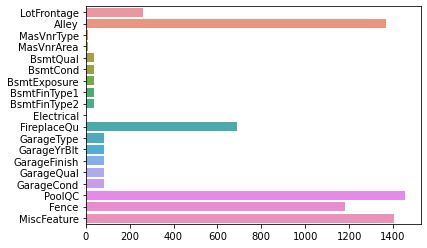

****
LotFrontage , 227 , 16 %
Alley , 1352 , 93 %
MasVnrType , 6 , 0 %
MasVnrArea , 6 , 0 %
BsmtQual , 44 , 3 %
BsmtCond , 45 , 3 %
BsmtExposure , 44 , 3 %
BsmtFinType1 , 42 , 3 %
BsmtFinType2 , 42 , 3 %
FireplaceQu , 730 , 50 %
GarageType , 76 , 5 %
GarageYrBlt , 78 , 5 %
GarageFinish , 78 , 5 %
GarageQual , 78 , 5 %
GarageCond , 78 , 5 %
PoolQC , 1456 , 100 %
Fence , 1169 , 80 %
MiscFeature , 1408 , 97 %


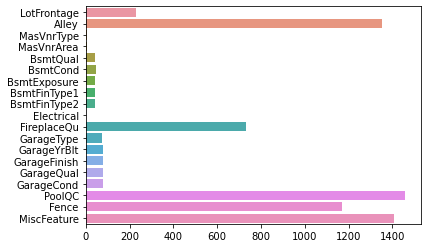

In [6]:
compare_null_values(train,test)

In [7]:
train1=train.dropna(subset=['SalePrice'],axis=0)

In [8]:
train1.dropna(subset=['SalePrice'],axis=0,inplace=True)
total = train1.isnull().sum().sort_values(ascending=False)
percent = (train1.isnull().sum()/train1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [9]:
train2 = train1.drop((missing_data[missing_data['Total']>=1]).index,axis=1)

In [10]:
train2.isnull().sum().max()

0

In [11]:
#train2['Total_SF']=train2[['TotalBsmtSF','1stFlrSF', '2ndFlrSF','GarageArea','GrLivArea','WoodDeckSF', 'OpenPorchSF',
#       'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea']].sum(axis=1)

#test['Total_SF']=test[['TotalBsmtSF','1stFlrSF', '2ndFlrSF','GarageArea','GrLivArea','WoodDeckSF', 'OpenPorchSF',
#       'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea']].sum(axis=1)

In [12]:
train3 = pd.get_dummies(train2)

In [13]:
X=train3.copy()
y=X.pop('SalePrice')
train_X, val_X, train_y, val_y = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def find_best_model_Gridsearchcv (X,y):
    
    algo={
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        
        'Decision Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
       'Random Forest':{
            'model': RandomForestRegressor(),
            'params': {
                'criterion': ['mse'],
                'n_estimators': [100]
                
            }
       },
        
        'K Nearest Neighbors':{
            'model': KNeighborsRegressor(),
            'params':{
                'n_neighbors':[5]
            }
        },
        
        'XGBRegressor':{
            'model': XGBRegressor(),
            'params':{
                'n_estimators':[50],
                
            }
        },
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algo.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_Gridsearchcv (X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251806035714.3285, tolerance: 719132949.923008
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280783598482.8325, tolerance: 720864768.5194055
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262506341315.3096, tolerance: 693434700.861312
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

,model,best_score,best_params
0,Linear Regression,0.681875,{'normalize': False}
1,Lasso,0.698953,"{'alpha': 1, 'selection': 'random'}"
2,Decision Tree,0.761762,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random Forest,0.842630,"{'criterion': 'mse', 'n_estimators': 100}"
4,K Nearest Neighbors,0.635982,{'n_neighbors': 5}
5,XGBRegressor,0.858948,{'n_estimators': 50}


In [23]:
test1 = test.drop((missing_data[missing_data['Total']>=1]).index,axis=1)


In [31]:
test.shape

(1459, 80)

In [24]:
test1.shape

(1459, 61)

In [26]:
train2.shape

(1460, 62)

In [27]:
train3.shape

(1460, 217)

In [28]:
test2=pd.get_dummies(test1)

In [30]:
test2.shape

(1459, 202)

In [35]:
final_train, final_test = X.align(test2, join='left', axis=1, fill_value=0)  # inner join

In [37]:
final_train.shape

(1460, 216)

In [38]:
final_test.shape

(1459, 216)

In [39]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(train_X,train_y)
test_pred=xgb.predict(final_test)

In [40]:
output = pd.DataFrame({'Id': test2.Id,
                       'SalePrice': test_pred})
output.to_csv('Ames_Housing_Submissio_Rev-0,Date-01.12.2022.csv', index=False)